In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.cross_validation import train_test_split, cross_val_score


import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')
print("Packages Loaded")

Packages Loaded


In [12]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
import sklearn
train, test = sklearn.cross_validation.train_test_split(data, train_size = 0.7)
print("For Main Data Set :",data["Outcome"].count())
print("For Train Set :",train["Outcome"].count())
print("For Test Set :",test["Outcome"].count())
x_train=train[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
x_test=test[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Pregnancies']]
y_train=train["Outcome"]
y_test=test["Outcome"]

For Main Data Set : 768
For Train Set : 537
For Test Set : 231


In [27]:
from sklearn import svm
model = svm.SVC(kernel='linear')

In [28]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True         0   1
Predicted         
0          124  44
1           18  45
             precision    recall  f1-score   support

          0       0.74      0.87      0.80       142
          1       0.71      0.51      0.59        89

avg / total       0.73      0.73      0.72       231



In [30]:
model.score(x_test,y_test)

0.73160173160173159

ROC AUC: 0.69


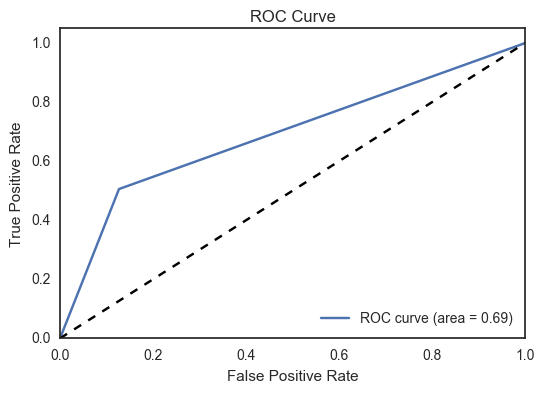

In [35]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.4007029876977154